In [69]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/top-100-cryptocurrency-2020-2025/top_100_cryptos_with_correct_network.csv


### **import library**

In [70]:
import seaborn as sns
import math

In [71]:
import warnings
warnings.simplefilter(action='ignore')
plt.style.use('seaborn')

# **Review of 20 of the best Cryptos**

In [72]:
df = pd.read_csv('/kaggle/input/top-100-cryptocurrency-2020-2025/top_100_cryptos_with_correct_network.csv')

In [73]:
df.head()

,symbol,date,open,high,low,close,network
0,BTCUSDT,2018-08-01,7735.67,7750.00,7430.00,7604.58,Bitcoin
1,BTCUSDT,2018-08-02,7600.08,7709.46,7455.72,7525.71,Bitcoin
2,BTCUSDT,2018-08-03,7525.71,7540.00,7282.44,7418.78,Bitcoin
3,BTCUSDT,2018-08-04,7412.27,7494.81,6926.00,7009.84,Bitcoin
4,BTCUSDT,2018-08-05,7009.84,7089.87,6882.29,7024.19,Bitcoin


In [74]:
df.tail()

,symbol,date,open,high,low,close,network
211674,UMAUSDT,2025-08-01,1.242,1.251,1.162,1.202,Ethereum
211675,UMAUSDT,2025-08-02,1.202,1.216,1.147,1.172,Ethereum
211676,UMAUSDT,2025-08-03,1.175,1.210,1.158,1.207,Ethereum
211677,UMAUSDT,2025-08-04,1.206,1.247,1.201,1.242,Ethereum
211678,UMAUSDT,2025-08-05,1.243,1.245,1.204,1.234,Ethereum


In [75]:
list_crypto = list(df['network'].unique())

In [76]:
mean_crypto = (
    df.groupby("network")
      .max(numeric_only=True)
      .loc[list_crypto]   
)

In [77]:
mean_crypto.head()

,open,high,low,close
network,,,,
Bitcoin,119954.430,123218.00,118905.180,119954.420
Ethereum,82875.440,95000.00,65990.000,82885.120
Binance Smart Chain,844.000,861.10,820.640,844.000
NEO,122.825,141.00,111.524,122.794
Litecoin,387.770,413.49,345.000,387.800


### **Review and check 20 cryptocurrencies**

In [78]:
df['date'] = pd.to_datetime(df['date'])
df = df.sort_values(['symbol', 'date'])
df['daily_return'] = df.groupby('symbol')['close'].pct_change()

In [79]:
df['cumulative_return'] = (1 + df['daily_return']).groupby(df['symbol']).cumprod() - 1

In [80]:
def calculate_metrics(x):
    x = x.dropna(subset=['daily_return'])
    days = (x['date'].iloc[-1] - x['date'].iloc[0]).days
    cagr = (x['close'].iloc[-1] / x['close'].iloc[0]) ** (365/days) - 1
    volatility = x['daily_return'].std() * np.sqrt(365)
    sharpe = (cagr - RISK_FREE_RATE) / volatility if volatility != 0 else np.nan
    cum_returns = (1 + x['daily_return']).cumprod()
    peak = cum_returns.cummax()
    drawdown = (cum_returns - peak) / peak
    max_drawdown = drawdown.min()
    
    return pd.Series({
        'CAGR': cagr,
        'Volatility': volatility,
        'Sharpe': sharpe,
        'Max_Drawdown': max_drawdown,
    })

In [81]:
RISK_FREE_RATE = 0.03   
metrics_df = df.groupby('symbol').apply(calculate_metrics).reset_index()
metrics_df = metrics_df.sort_values(by='Sharpe', ascending=False)
top_20 = metrics_df.head(20)

In [82]:
def metric_plot(col_name):
    plt.figure(figsize=(12,6))
    
    bars = plt.bar(top_20['symbol'], top_20[col_name], alpha=0.8)

    for bar in bars:
        height = bar.get_height()
        plt.text(
            bar.get_x() + bar.get_width() / 2, 
            height,                             
            f"{height:.2f}",                     
            ha='center', va='bottom'
        )

    plt.title(f"{col_name} for Top 20 Cryptocurrencies")
    plt.xlabel("Symbol")
    plt.ylabel(col_name)
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.3)

    plt.tight_layout()
    plt.show()


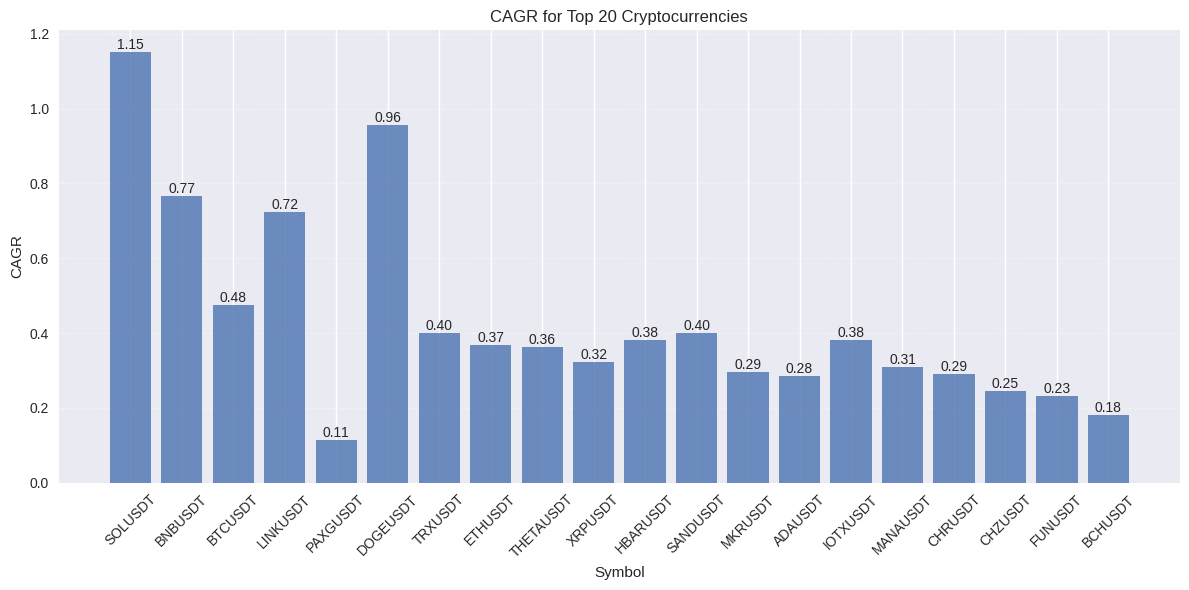

In [83]:
metric_plot('CAGR')

- **SOL** and **DOGE** have the highest returns, but also a lot of risk.

- **BNB** and **BTC** have good growth and relative stability, making them the best risk-return options.

- **PAXG** has the lowest growth but is the safest choice against market volatility.

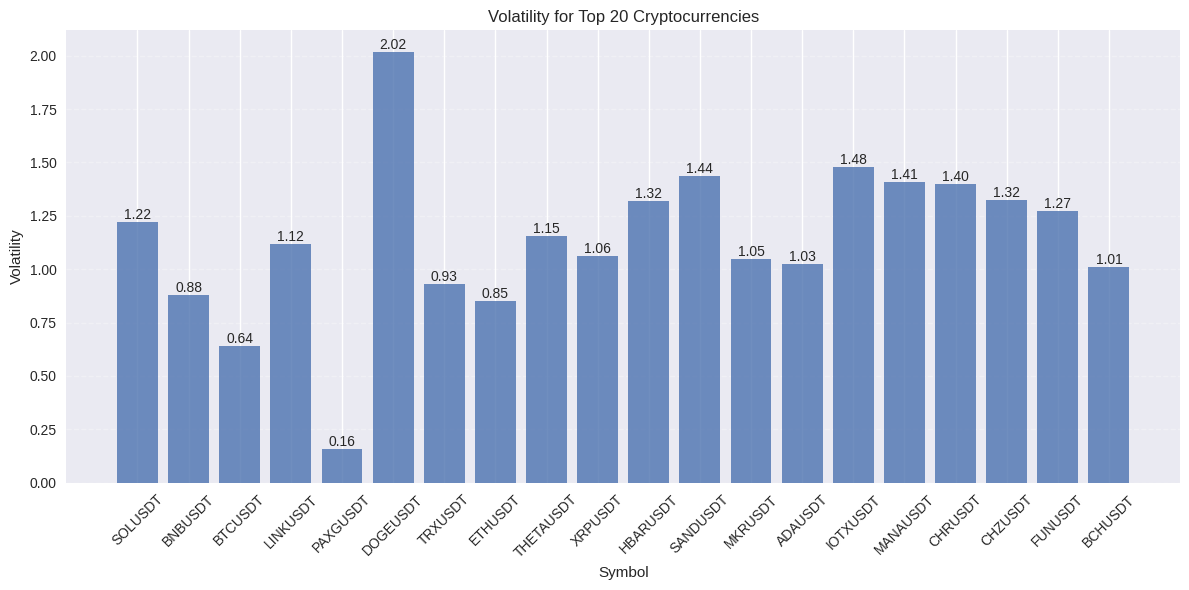

In [84]:
metric_plot('Volatility')

- **Most volatile:** **DOGE**, high risk, possible returns but very risky

- **Least volatile:** **PAXG**, a digital version of gold, suitable for hedging

- **Balanced:** **BTC** and **BNB** and **ETH**, a good balance between risk and return

- **Metaverse** and **gaming projects** **SAND** and **MANA** and **CHR** are among the most volatile groups.

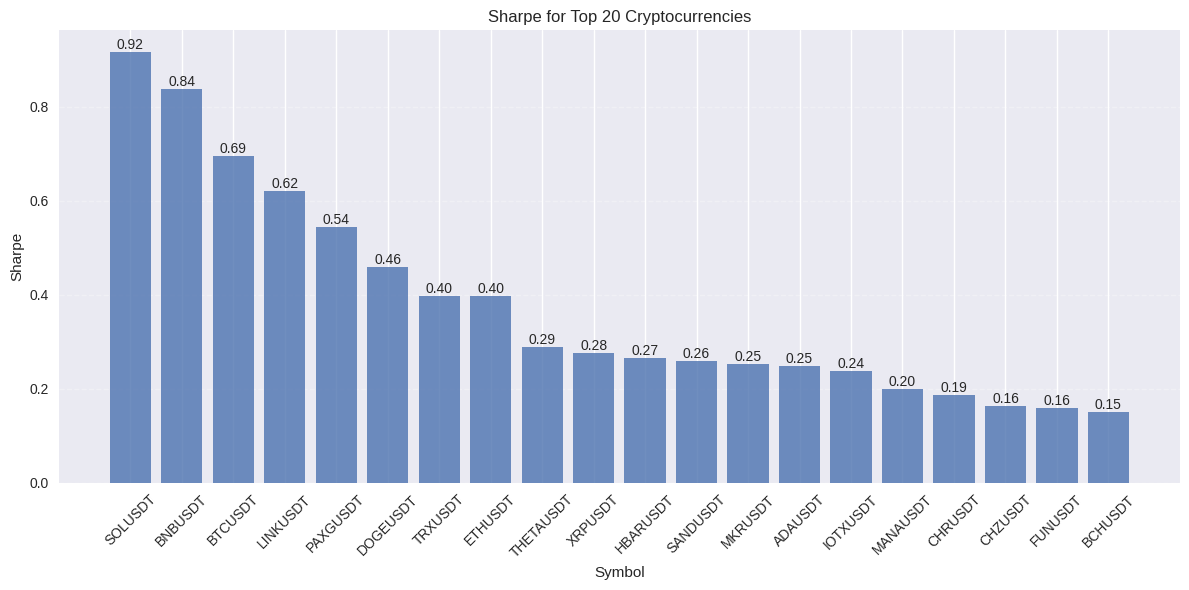

In [85]:
metric_plot('Sharpe')

- The return and risk of cryptocurrencies shows that **SOL, BNB and BTC have the best risk-return ratio** and are suitable for safer investments.
- The next group such as **LINK, PAXG and DOGE** have good returns with acceptable risk and are suitable choices for the medium term.
- The medium category includes **ETH, TRX, THETA, ADA, SAND**, which are more volatile and require caution and careful timing.
- Finally, currencies such as **MANA, CHR, CHZ, FUN and BCH** have high risk but low returns and are not recommended for long-term investments.

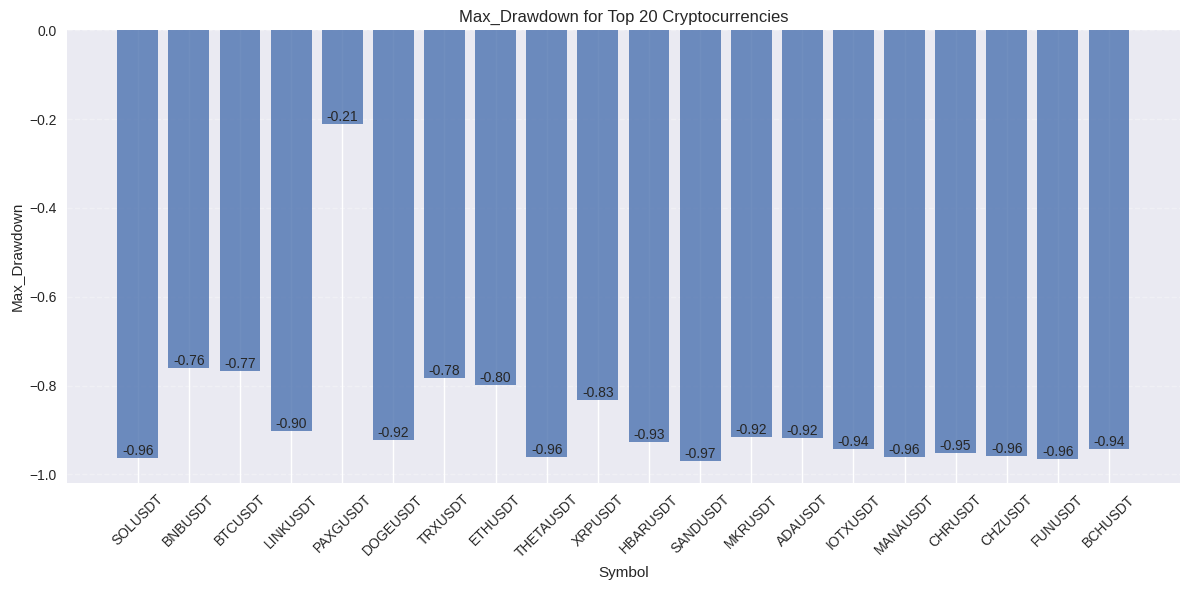

In [86]:
metric_plot('Max_Drawdown')

The Max Drawdown chart shows that some cryptocurrencies like **BTC, PAXG, and UNK** have been much more resilient during severe market declines and have experienced limited drawdowns, making them a lower-risk investment option. In contrast, a group like **SOL, THETA, SAND, MANA, CHZ, and FUN** have had very severe drawdowns and are inherently **high-risk**; meaning that while they may offer large returns, there is a high chance of losing a large portion of your capital. Cryptocurrencies like **BNB, ETH, TRX, and XRP** fall in between these two categories, offering moderate risk and stability.

In [87]:
top_coins = list(top_20.symbol)

In [88]:
top_df = df[df['symbol'].isin(top_coins)]

In [89]:
final_returns = top_df.groupby('symbol').apply(lambda x: (x['close'].iloc[-1] / x['close'].iloc[0]) - 1)
top_20_return = final_returns.sort_values(ascending=False).head(20)

In [90]:
top_20_return = top_20_return.reset_index().rename(columns={'symbol':'symbol', 0:'return'})

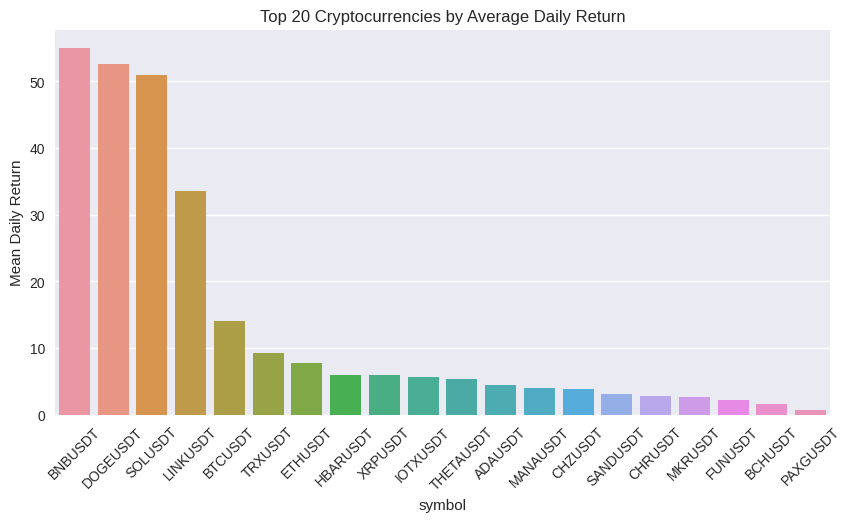

In [91]:
plt.figure(figsize=(10,5))
sns.barplot(x=top_20_return['symbol'], y=top_20_return['return'])
plt.title("Top 20 Cryptocurrencies by Average Daily Return")
plt.ylabel("Mean Daily Return")
plt.xticks(rotation=45)
plt.show()

BNB has recorded the highest daily return at around **55%**, followed by **DOGE (~52%)** and **SOL (~48%)**, all of which are volatile but highly productive. **Bitcoin** has performed reasonably well at around **35%**, but is not among the best. In contrast, **PAXG** is almost flat and very low-risk. **Metaverse and gaming** tokens such as MANA, SAND, and CHZ have limited returns of **1-5%**. Most altcoins have seen daily growth between **5-15%**, and a group of quasi-stable or low-volatility assets (PAXG, BCH, FUN) have shown returns of less than **3%**.

In [92]:
pivot = df[df['symbol'].isin(top_coins)].pivot(index='date', columns='symbol', values='close')

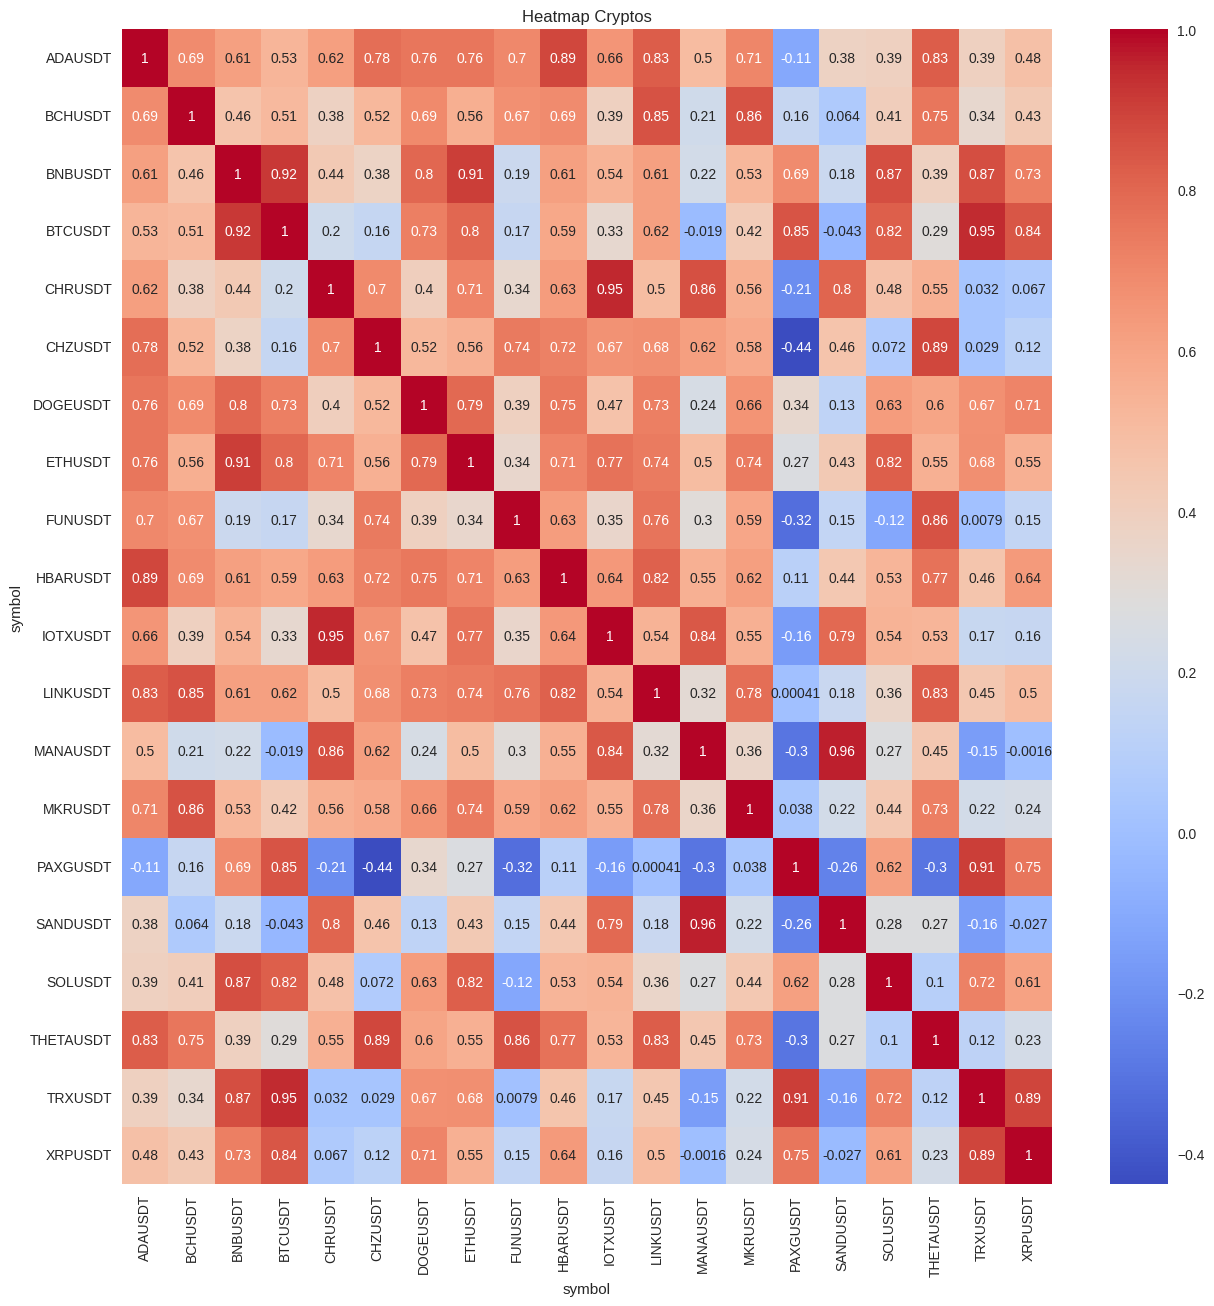

In [93]:
plt.figure(figsize=(15,15))
corr = pivot.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Heatmap Cryptos')
plt.savefig('heatmape.png')
plt.show()

In [94]:
df['AbsReturn'] = df['daily_return'].abs()
threshold = df['AbsReturn'].quantile(0.99)
extreme_moves = df[df['AbsReturn'] > threshold]

In [95]:
df3 = extreme_moves[extreme_moves['symbol'].isin(list(top_coins))] 

In [96]:
def coin_plot(list_name):
    plt.figure(figsize=(12,6))
    for coin in list_name:
        subset = df[df['symbol'] == coin]
        plt.plot(subset['date'], subset['cumulative_return'], label=coin)
    plt.title("Cumulative Return of Selected Cryptocurrencies")
    plt.xlabel("Date")
    plt.ylabel("Cumulative Return")
    plt.legend()
    plt.show()

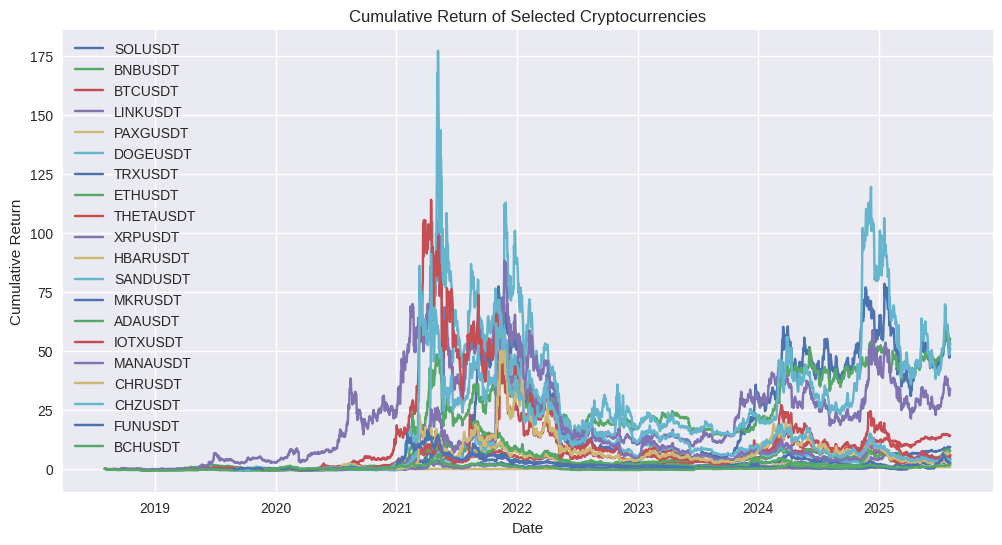

In [97]:
coin_plot(top_coins)

In [98]:
high_return_high_risk = ["DOGEUSDT", "THETAUSDT", "HBARUSDT", "SANDUSDT", "IOTXUSDT",
    "MANAUSDT", "CHRUSDT", "CHZUSDT", "FUNUSDT"]
high_return_medium_risk = ["SOLUSDT", "LINKUSDT", "XRPUSDT", "MKRUSDT", "ADAUSDT",
    "BCHUSDT", "TRXUSDT", "ETHUSDT"]
high_return_low_risk = ["BNBUSDT", "BTCUSDT", "PAXGUSDT"]

**High Risk, High Return Category:** Includes DOGEUSDT, THETAUSDT, HBARUSDT, SANDUSDT, IOTXUSDT, MANAUSDT, CHRUSDT, CHZUSDT and FUNUSDT which have extreme volatility and deep drops (often above 92%), but show high daily returns in bullish periods; suitable for professional and short-term traders.

**Medium Risk, High Return Category:** Includes SOLUSDT, LINKUSDT, XRPUSDT, MKRUSDT, ADAUSDT, BCHUSDT, TRXUSDT and ETHUSDT which have high correlation with Bitcoin, have drops of 80-97%, but provide significant daily returns; suitable for medium-term investment with a technical perspective.

**Low Risk, High Return Category:** Includes BNBUSDT, BTCUSDT and PAXGUSDT, which have the most stable performance (maximum drop of 77% for BTC and close to zero for PAXG), with high daily returns and reasonable correlation with the market; the best choice for long-term investment and balanced portfolios.

### **Plot of moving averages over the last 30 days**

In [99]:
def return_plot(name_list):
    n = len(name_list)
    rows = 2
    cols = math.ceil(n / 2)

    fig, axes = plt.subplots(rows, cols, figsize=(6 * cols, 5 * rows))

    axes = axes.flatten()

    for i, name in enumerate(name_list):
        crypto = df[df['symbol'] == name].copy()

        crypto['RollingMean'] = crypto['close'].rolling(30).mean()
        crypto['RollingVol'] = crypto['daily_return'].rolling(30).std()

        ax = axes[i]

        ax.plot(crypto['date'], crypto['close'], alpha=0.5, label='Close Price')
        ax.plot(crypto['date'], crypto['RollingMean'], label='30D Moving Average')

        ax.set_title(f"{name} – 30-Day Moving Average")
        ax.legend()
        ax.grid(True)

    for j in range(i+1, len(axes)):
        axes[j].axis("off")
    plt.savefig(f'p.png')
    plt.tight_layout()
    plt.show()



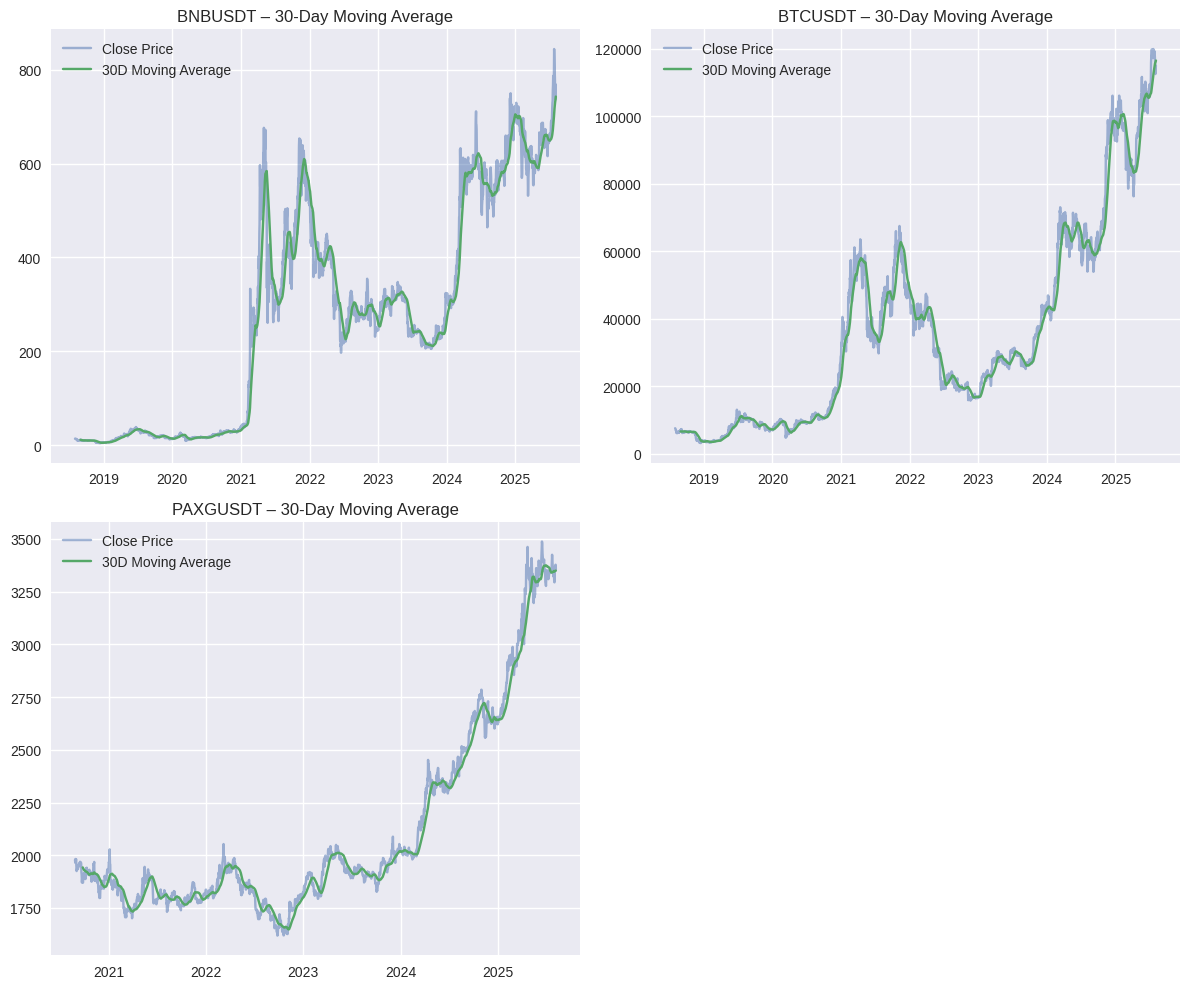

In [100]:
return_plot(high_return_low_risk)

**BTC** and **BNB** are in a strong uptrend (buy/hold), PAXG is best for capital preservation in corrections.

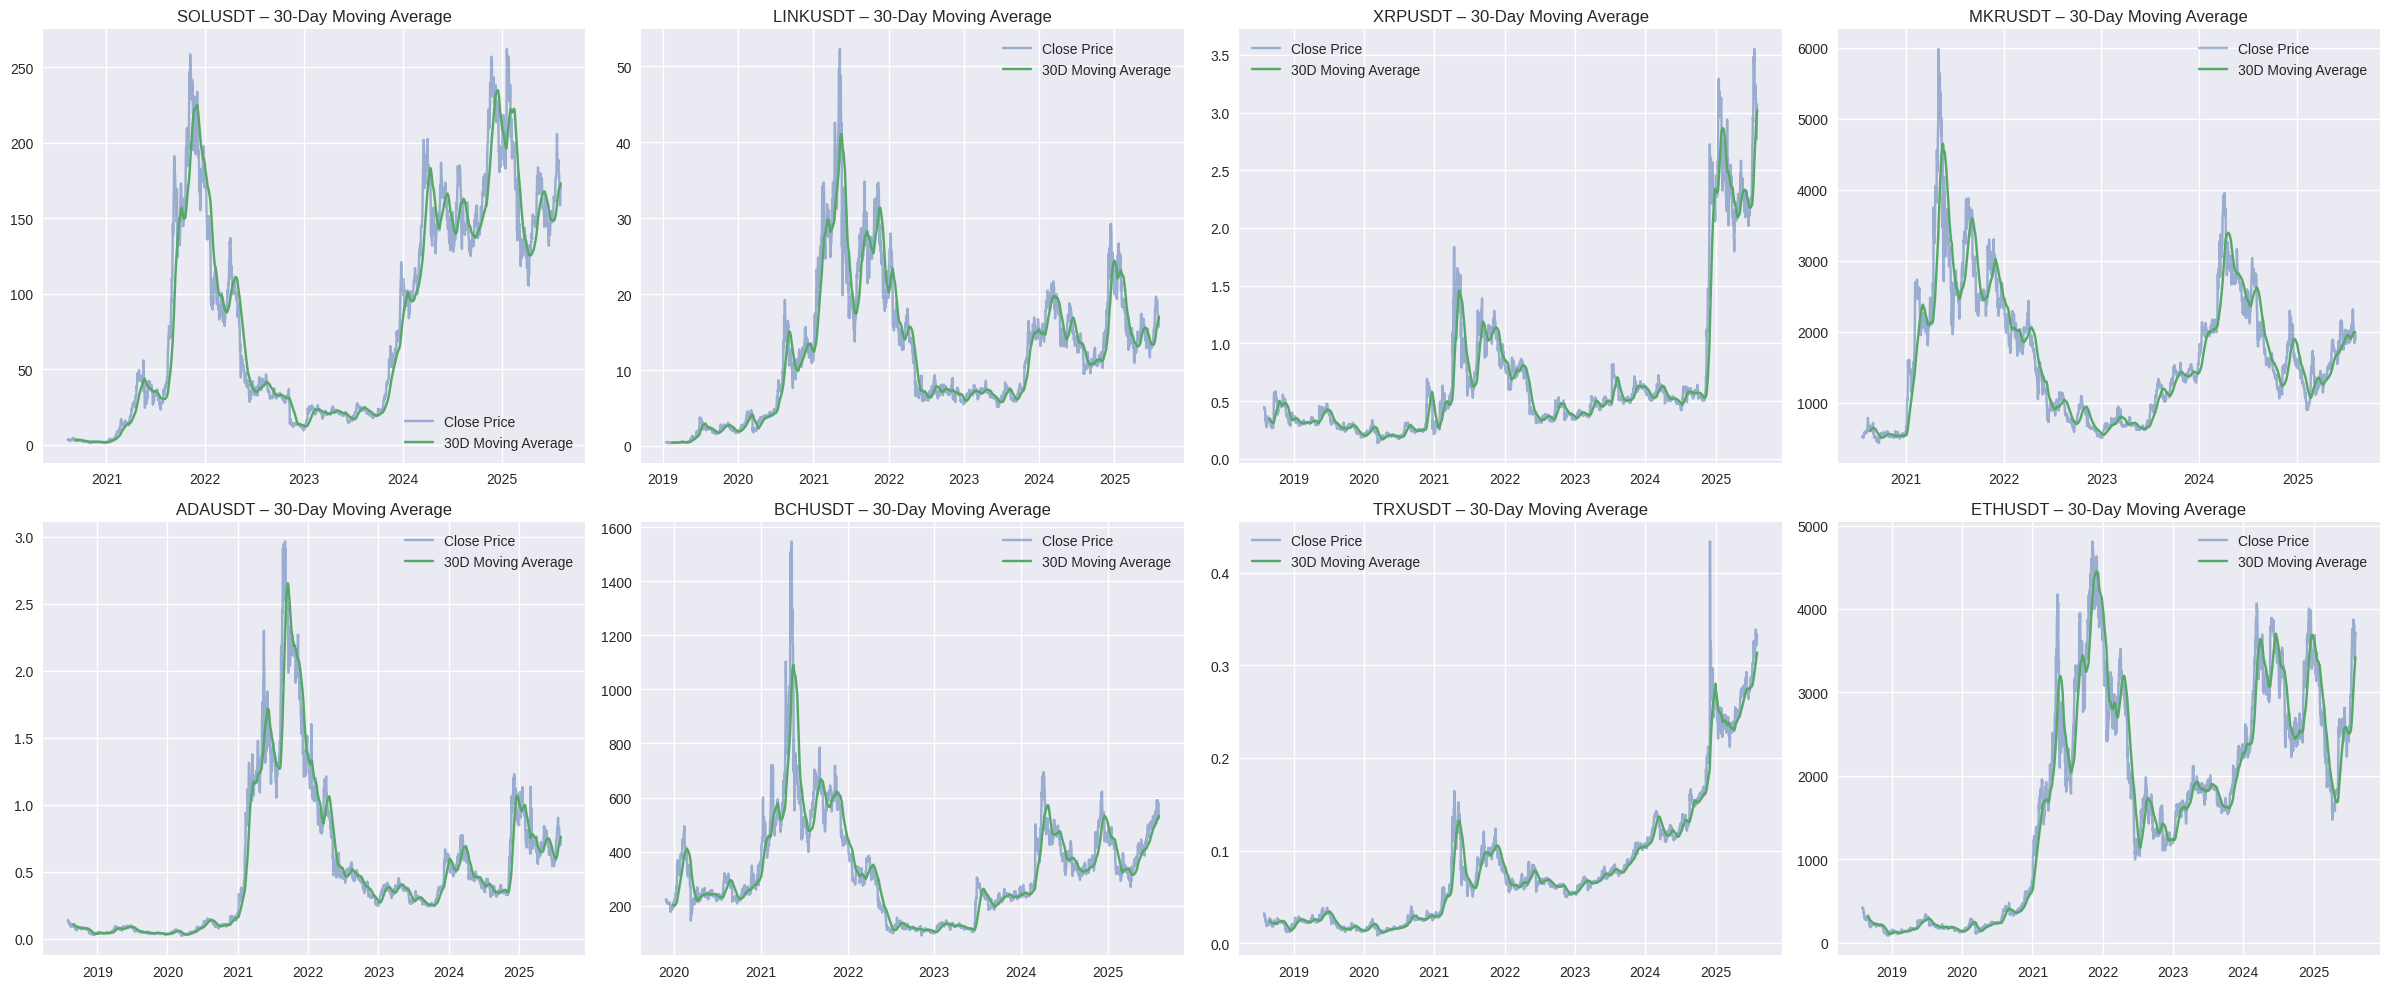

In [101]:
return_plot(high_return_medium_risk)

Ethereum has also risen to around 3,200 .with a high daily return and a correlation of 0.91 with Bitcoin. Binance Coin and Solana are the best performers in the medium-risk category with a daily return of over 45% and explosive growth from the 2022 low. Although Solana corrected slightly to 220 in August, metaverse tokens such as Sandbox and Decentraland are still the riskiest with a correlation of 0.96 and a maximum drop of 97% and are trading below 0.5 on this date. Pax Gold has stabilized as a safe haven with near-zero volatility and a slow growth of 1.8x since 2021, at around $3,000. Most altcoins have fallen more than 90% historically but are now trading above their 30-day moving averages. Therefore, the optimal portfolio strategy includes 60% Bitcoin and Ethereum for long-term holding, 30% Binance Coin and Solana for rapid growth, and 10% Pax Gold for Risk control; overall, the market is poised for an autumn rally after the August correction, and the current lows are a buying opportunity.

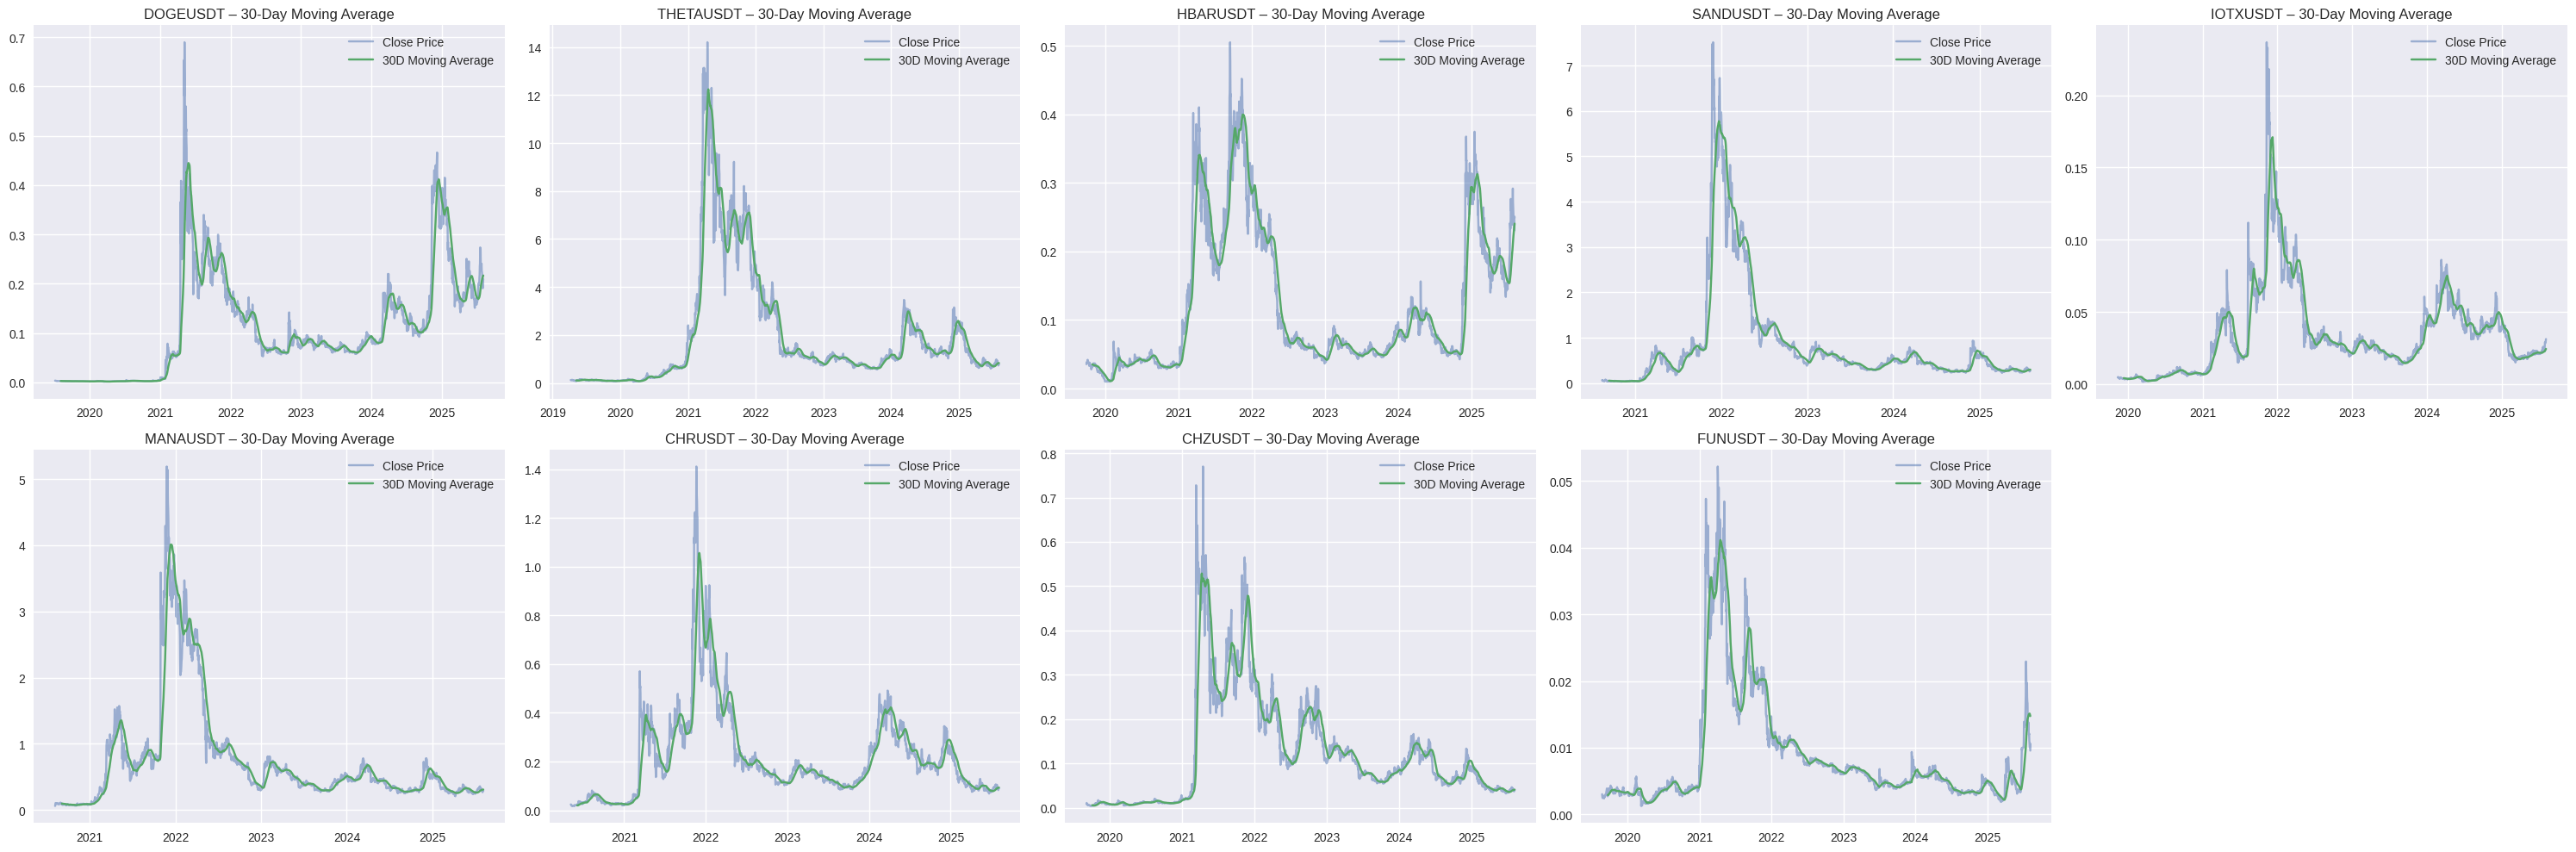

In [123]:
return_plot(high_return_high_risk)

The risky altcoin group has been facing extreme volatility but high return potential, with Dogecoin reaching around 0.16 with the meme bubble in 2021 and the recent recovery, trading above the 30-day moving average, Theta Network as a video platform has risen to 1.8 and is showing a sustainable upward trend, Hedra Hashgraph peaked at 0.29 with a listing on Robinhood and network upgrade, but corrected to 0.18-0.20 in August and maintained support at 0.158, Sandbox in the metaverse has stabilized at 0.3 with a heavy drop of 97% and has a high correlation with Mana, IoTex as a stable IoT has reached 0.03 and has continued to grow, Mana in the metaverse has returned to 0.3 but remains risky, Chromia in DeFi has risen to 0.2, Chiliz as a sports token has reached 0.06 It is up and bullish, and FunToken has fluctuated on low volume to $0.004; overall, the group is trading above the MA30 and the August correction is a short-term buying opportunity, but with high correlation with Solana and Bitcoin, there is a risk of a deep drop and it is recommended to allocate a maximum of 10-20% of the portfolio to it.

### **Cumulative Profit Plot from Cryptocurrencies**

In [103]:
def cumulative_return_plot(name_list):
    n = len(name_list)
    rows = 2
    cols = math.ceil(n / 2)

    fig, axes = plt.subplots(rows, cols, figsize=(6 * cols, 5 * rows))

    axes = axes.flatten()

    for i, name in enumerate(name_list):
        crypto = df[df['symbol'] == name].copy()
        crypto['RollingMean'] = crypto['cumulative_return'].rolling(30).mean()
        ax = axes[i]
     
        ax.plot(crypto['date'], crypto['cumulative_return'], alpha=0.5, label='Cumulative Return Price')
        ax.plot(crypto['date'], crypto['RollingMean'], alpha=0.5, label='30D Moving Average')

        ax.set_title(f"{name} – 30-Day")
        ax.legend()
        ax.grid(True)

    for j in range(i+1, len(axes)):
        axes[j].axis("off")

    plt.tight_layout()
    plt.show()

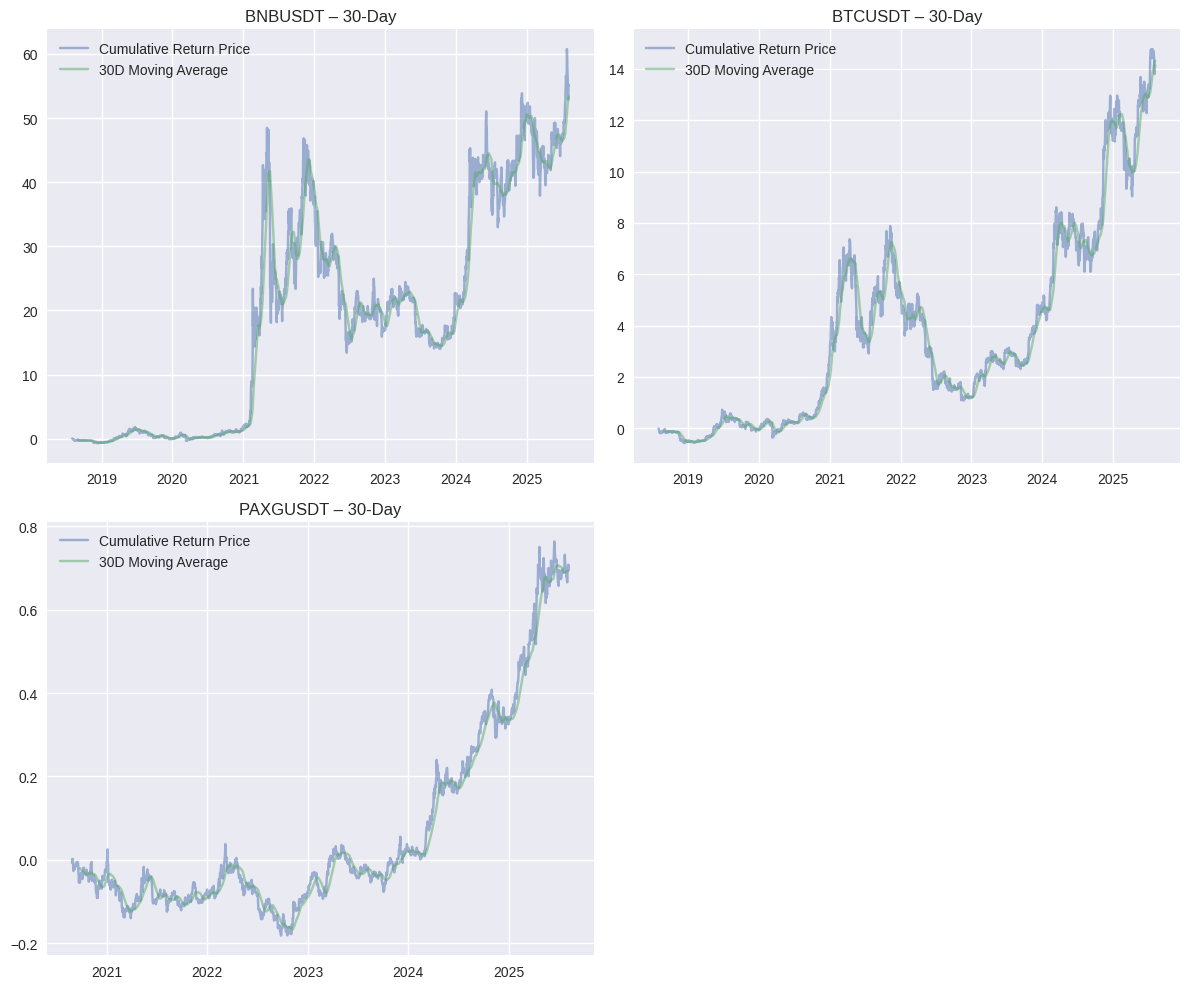

In [104]:
cumulative_return_plot(high_return_low_risk)

**BTC** and **BNB** are in a strong uptrend with cumulative gains, PAXG is the best option to preserve capital in price corrections.

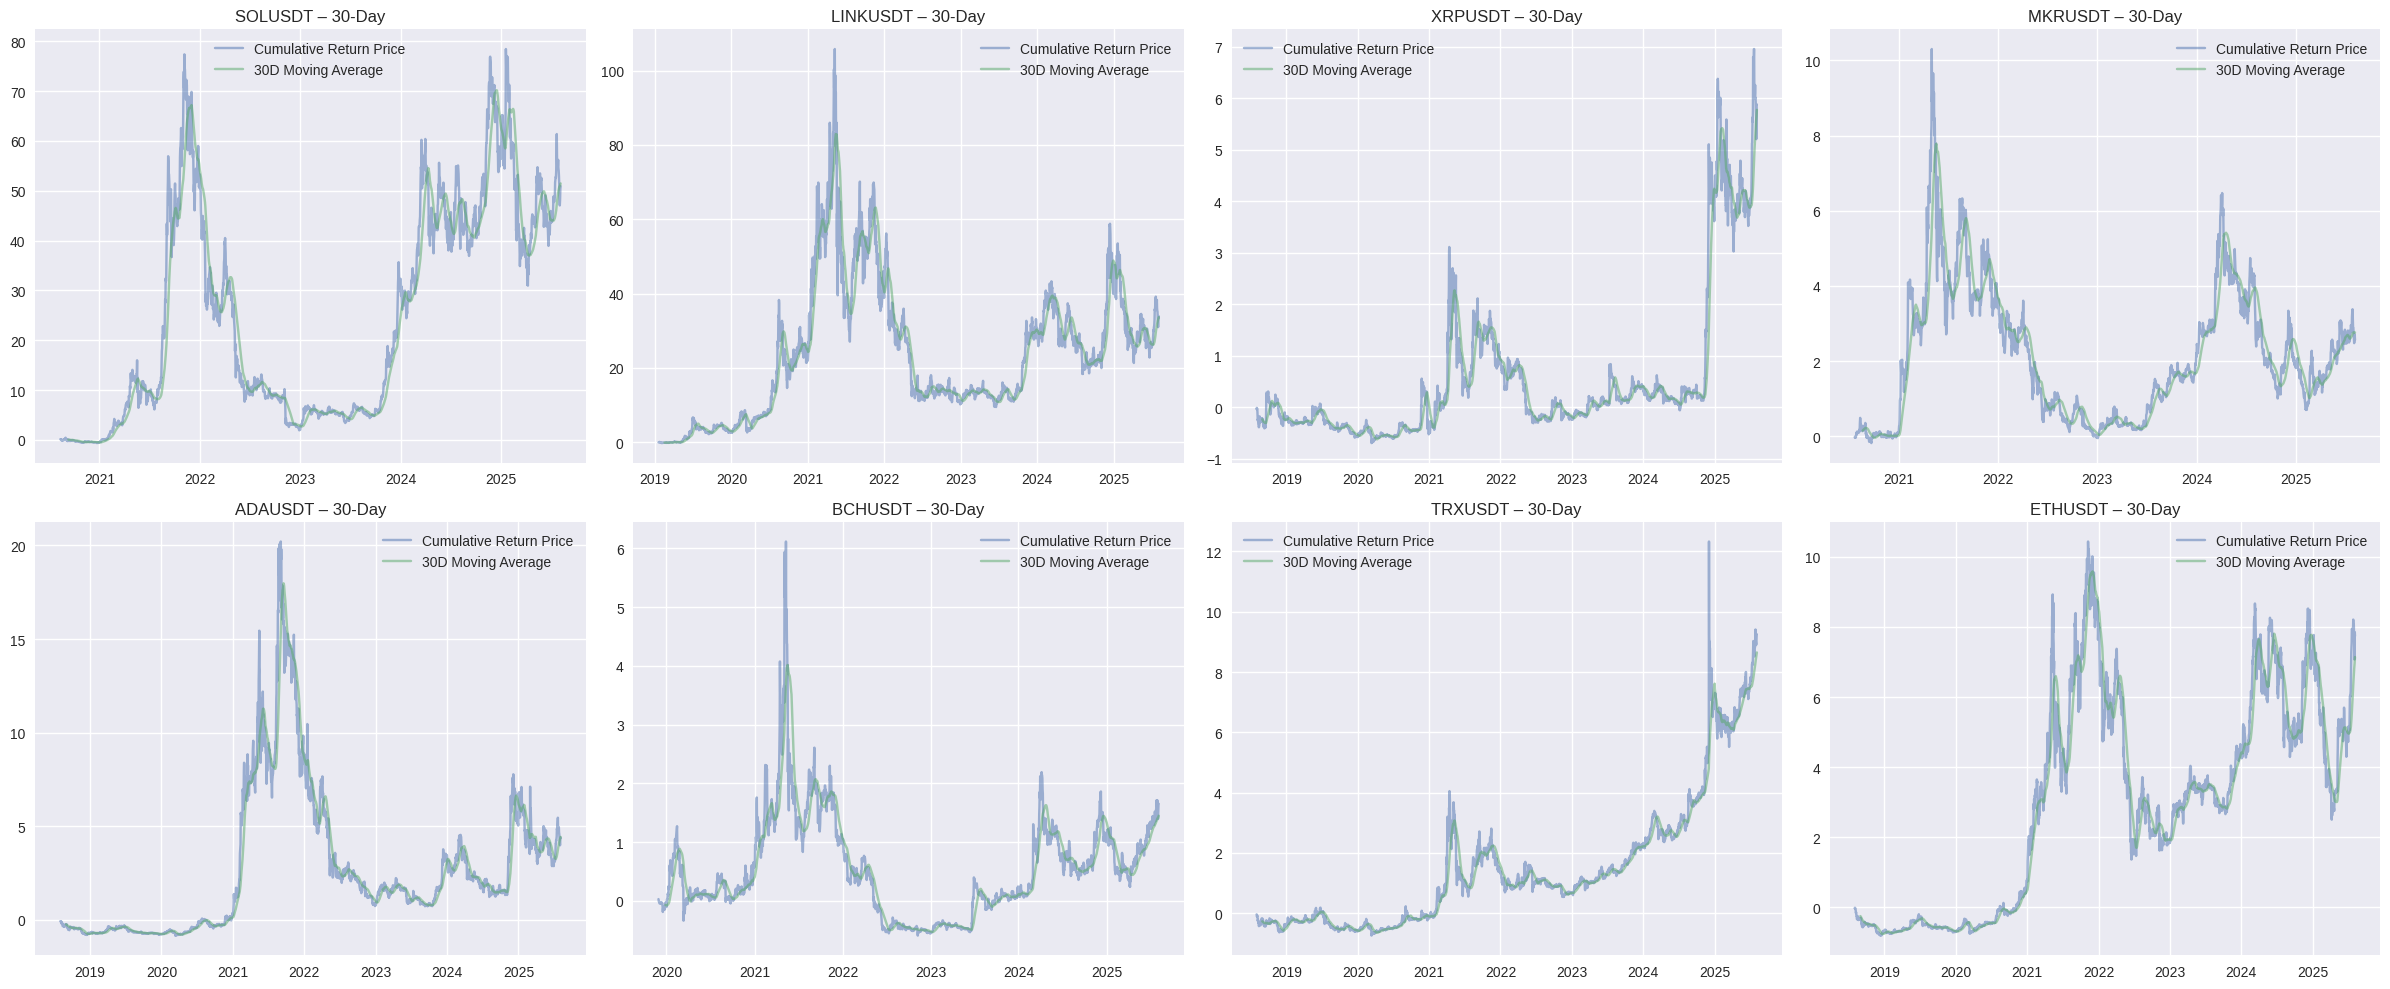

In [105]:
cumulative_return_plot(high_return_medium_risk)

In cumulative gains, Ethereum has also reached around 3,200 with a high daily return and a correlation of 0.91 with Bitcoin. Binance Coin and Solana are the best performers in the medium-risk category with daily returns of over 45% and explosive growth from the 2022 low. Although Solana corrected slightly to 220 in August, metaverse tokens such as Sandbox and Decentraland remain the riskiest with a correlation of 0.96 and a maximum drop of 97%, trading below 0.5 on this date. Pax Gold has established itself as a safe haven since 2021 with near-zero volatility and a slow growth of 1.8x, at around $3,000. Most altcoins have historically seen over 90% price declines, but are now trading above their 30-day moving averages. Therefore, the optimal investment portfolio strategy includes 60% Bitcoin and Ethereum for long-term holding, 30% Binance Coin and Solana for rapid growth, and 10% Pax Gold for risk control; Overall, the market is poised for an autumn rally after the August correction, and the current lows are a buying opportunity.

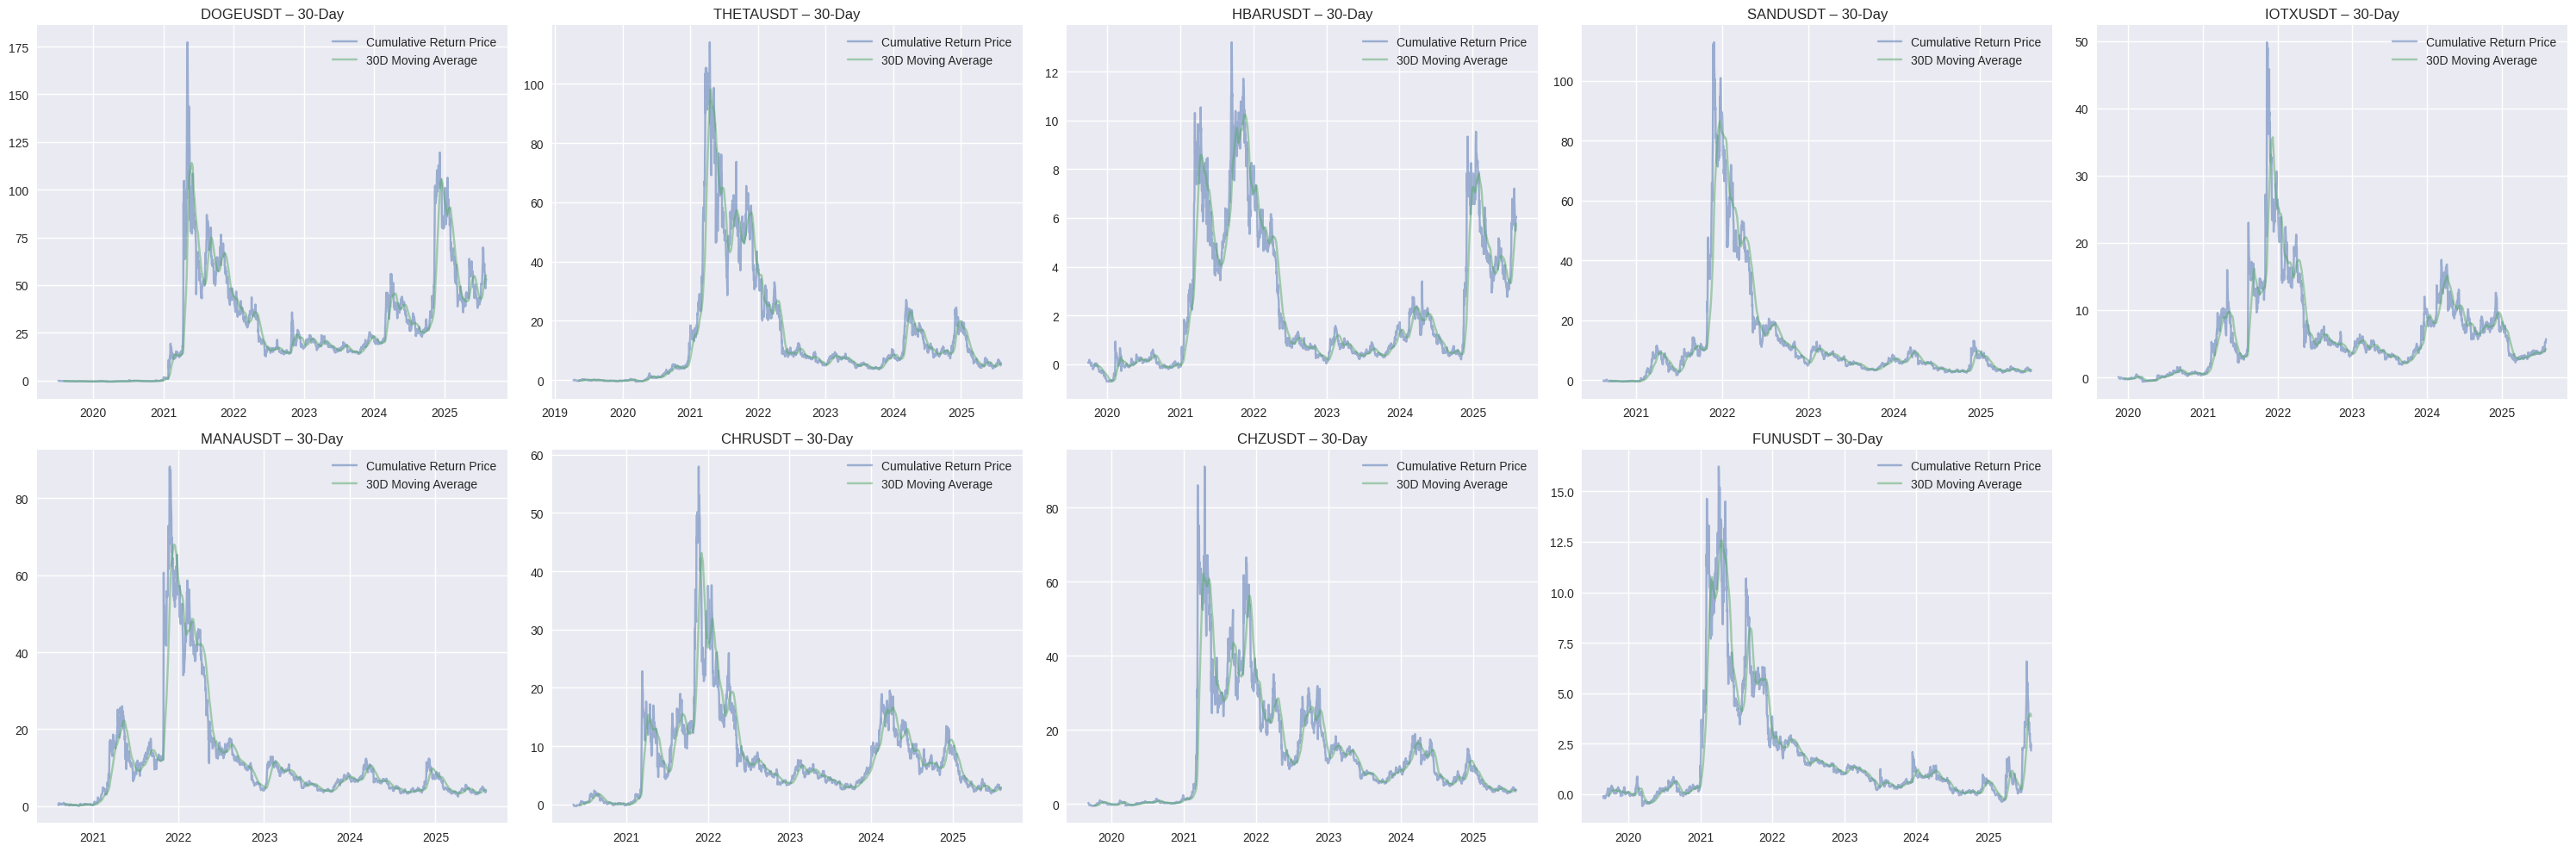

In [106]:
cumulative_return_plot(high_return_high_risk)

In cumulative gains, the group of risky altcoins has faced severe volatility but high return potential, with Dogecoin reaching around 0.16 with the meme bubble in 2021 and the recent recovery and trading above the 30-day moving average, Theta Network as a video platform has risen to 1.8 and is showing a sustainable uptrend, Hedra Hashgraph reached its peak of 0.29 with its placement on Robinhood and network upgrade, but corrected to 0.18-0.20 in August and maintained the support level of 0.158, Sandbox in the metaverse has stabilized at 0.3 with a sharp drop of 97% and has a high correlation with Mana, IoTeX as a stable IoT has reached 0.03 and continues to grow, Mana in the metaverse has returned to 0.3 but is still risky, Chromia in DeFi has risen to 0.2, Chiliz as a token Sport reached 0.06 and is bullish, and FunToken has fluctuated with low volume. $0.004; Overall, the group is trading above the 30-day moving average (MA30) and the August price correction is a short-term buying opportunity, but with a high correlation with Solana and Bitcoin, there is a risk of a sharp decline and it is recommended to allocate a maximum of 10-20% of the investment portfolio to it.

### **Volatility comparison**

In [107]:
low_risk = df[df['symbol'].isin(high_return_low_risk)]
medium_risk = df[df['symbol'].isin(high_return_medium_risk)]
high_risk = df[df['symbol'].isin(high_return_high_risk)]

In [108]:
def calc_volatility(x):
    x = x.dropna(subset=['daily_return'])
    return x['daily_return'].std() * np.sqrt(365)

In [109]:
def vol_bar(df_vol):
    plt.figure(figsize=(10,6))
    bars = plt.bar(df_vol['symbol'], df_vol['volatility'], color='skyblue')

    for bar in bars:
        height = bar.get_height()
        plt.text(
            bar.get_x() + bar.get_width() / 2,  
            height,                             
            f"{height:.2f}",                    
            ha='center', va='bottom'             
        )

    plt.xlabel('Symbol')
    plt.ylabel('Volatility')
    plt.title('Volatility per Crypto')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
    

In [110]:
vol_low_risk_df = low_risk.groupby('symbol').apply(calc_volatility).reset_index()
vol_low_risk_df.columns = ['symbol', 'volatility']

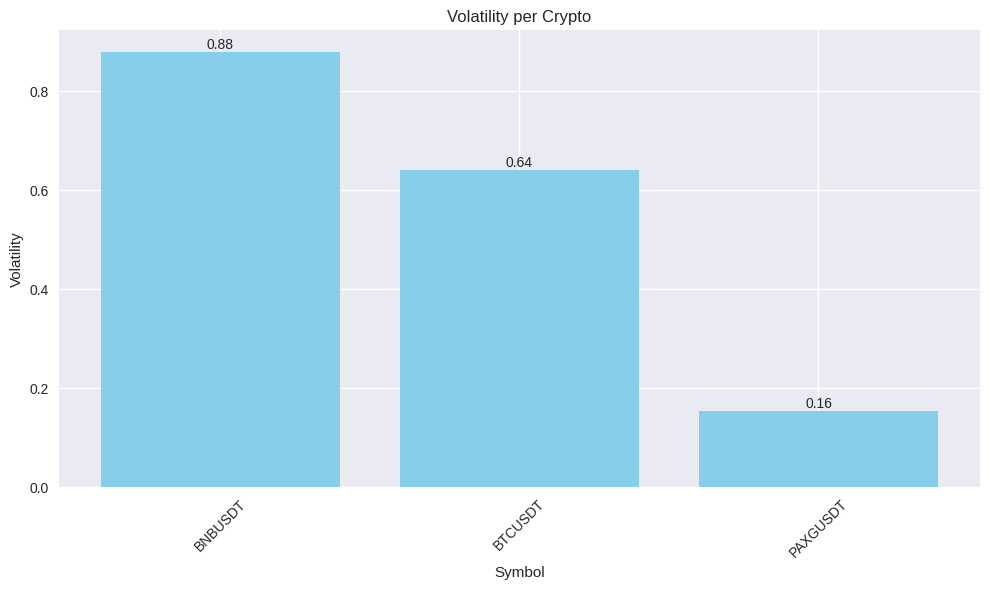

In [111]:
vol_bar(vol_low_risk_df)

The low-risk pair, consisting of BNBUSDT, BTCUSDT, and PAXGUSDT, shows relatively low volatility compared to the high-risk altcoins, where BNBUSDT remains volatile with a volatility of 0.88 (the highest in the group) but below the altcoin average, BTCUSDT remains relatively stable as the market leader with a volatility of 0.64 (equivalent to about 2.42% in the recent day) and trades in the range of 109,800 to 111,200, while PAXGUSDT, with the lowest volatility of 0.16 (close to zero) as the gold-backed asset, offers the least risk and its price has stabilized around $3,000; These levels represent a good balance in a low-risk portfolio, where the overall volatility of the group remains below the 0.6 average and recent corrections (like August) have passed without a sharp drop, thus making it suitable for long-term holding with a 50% focus on BTC for volatility balance and 30% on PAXG for absolute stability.

In [112]:
vol_medium_risk_df = medium_risk.groupby('symbol').apply(calc_volatility).reset_index()
vol_medium_risk_df.columns = ['symbol', 'volatility']

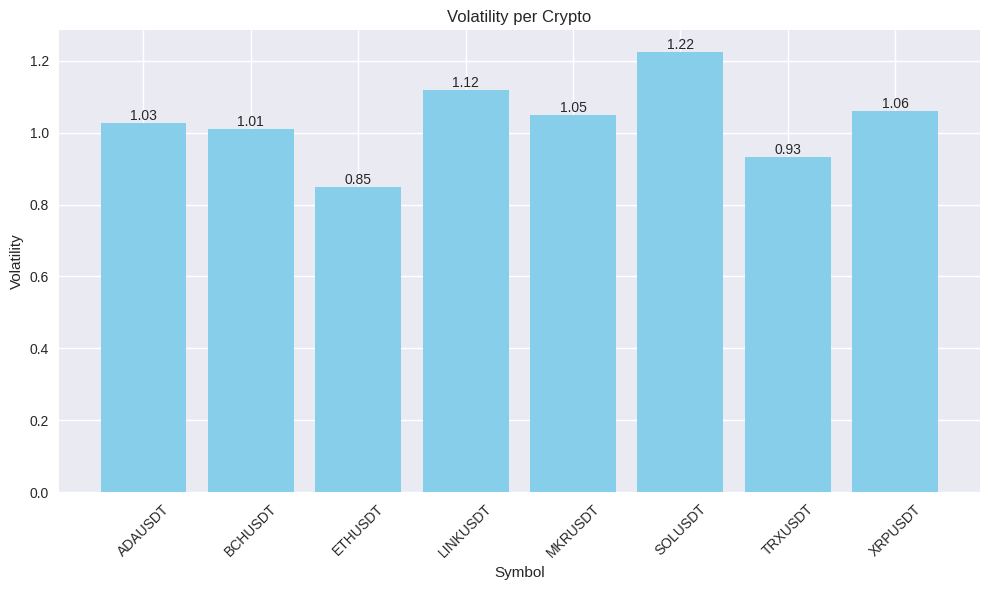

In [113]:
vol_bar(vol_medium_risk_df)

The medium risk group faces relatively high but controlled volatility, with Cardano (ADAUSDT) maintaining relative stability with a volatility of 1.03 (about 3.5% daily) and trading in the range of 0.70-0.71, Bitcoin Cash (BCHUSDT) with a volatility of 1.01 and a correlation with Bitcoin rising to around 450, Ethereum (ETHUSDT) with the lowest volatility in the group (2.9% daily) has consolidated as the market leader at 3,200, Chainlink (LINKUSDT) with a volatility of 1.12 (the highest in the group, 3.8% daily) has shown a dynamic volatility and has grown from 25 to 28, Maker (MKRUSDT) with a volatility of 1.05 has maintained its DeFi risk with a volatility of 2,800 with a volatility of 1.22 (4.2% daily) has shown the most explosive behavior and after the August correction to 220 The dollar has returned, Tron (TRXUSDT) has risen to 0.35 with the least volatile 0.93 (3.2% daily), and Ripple (XRPUSDT) has risen to $2.2 with a moderate 1.06; overall, the group's average volatility is around 1.04, which is above low risk (0.56) but below high risk (>1.2) and indicates growth potential with manageable risk, so it is suitable for a 30% portfolio focusing on ETH and TRX for balance and SOL for high returns in the fall bull market.

In [114]:
vol_high_risk_df = high_risk.groupby('symbol').apply(calc_volatility).reset_index()
vol_high_risk_df.columns = ['symbol', 'volatility']

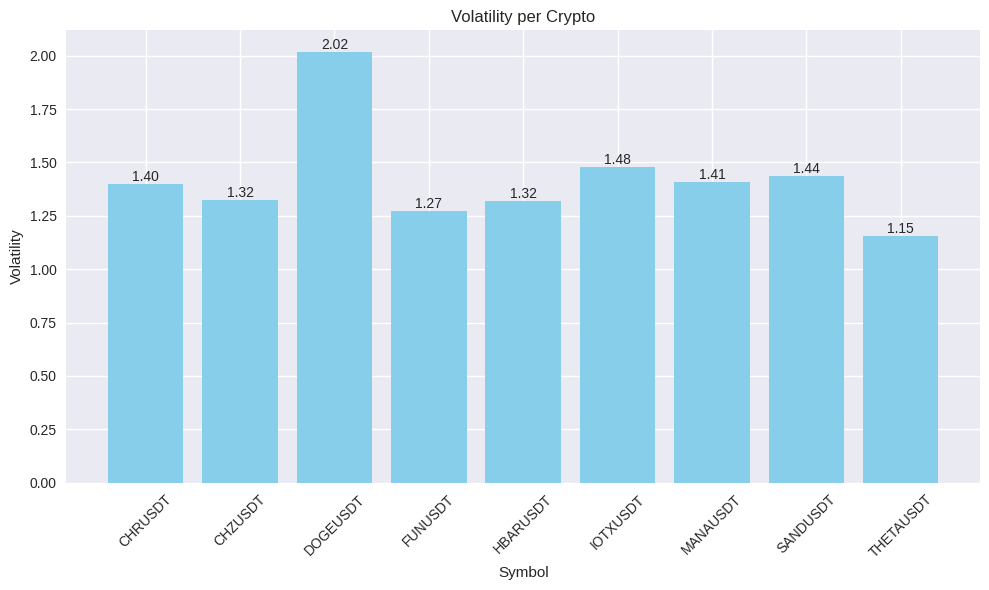

In [115]:
vol_bar(vol_high_risk_df)

The high-risk group has been facing very high and volatile volatility, with Chromia (CHRUSDT) reaching around 0.25 with a volatility of 1.40 (about 4.8% daily) as a volatile DeFi token and maintaining support at 0.20, Chiliz (CHZUSDT) has climbed to 0.09 with a volatility of 1.32 with a moderate volatility in the group and a focus on sports, Dogecoin (DOGEUSDT) has stabilized at 0.18 with a volatility of 2.02 (6.9% daily, influenced by meme hype) and has shown a recovery after the July correction, Fun Token (FUNUSDT) with a risk of 1.27 has maintained its low volume with high volatility at 0.005, Hedra (HBARUSDT) with a volatility of 1.32 and about 6.38% in the last 30 days has reached 0.06 and has been more volatile due to ETF filings, IOTX (IOTXUSDT) with a volatility of 1.32 IoT More stable but risky has risen to 0.04, Mana (MANAUSDT) has stabilized at 0.35 with 1.48 in the metaverse and correlation with Sandbox, Sandbox (SANDUSDT) has returned to 0.38 with 1.44 heavy drop but high volatility, and Theta (THETAUSDT) has reached $2.1 with 1.15 the least volatile in the group (3.9% daily); Overall, the group average volatility is around 1.42, which is well above the medium risk (1.04) and low risk (0.56) and indicates huge return potential but risk of deep drop in corrections, so suitable for 10% portfolio focusing on DOGE and THETA for short-term trading and avoiding FUN in quiet markets.

# **Portfolio optimization**

In [116]:
BNBUSDT_close	= list(low_risk[low_risk['symbol']=='BNBUSDT'].iloc[758:]['close'])
BTCUSDT_close	= list(low_risk[low_risk['symbol']=='BTCUSDT'].iloc[758:]['close'])
PAXGUSDT_close = list(low_risk[low_risk['symbol']=='PAXGUSDT'].iloc[:]['close'])

In [117]:
BNBUSDT_open	= list(low_risk[low_risk['symbol']=='BNBUSDT'].iloc[758:]['open'])
BTCUSDT_open	= list(low_risk[low_risk['symbol']=='BTCUSDT'].iloc[758:]['open'])
PAXGUSDT_open = list(low_risk[low_risk['symbol']=='PAXGUSDT'].iloc[:]['open'])

In [118]:
df_close = pd.DataFrame(
    {
        'BNBUSDT': BNBUSDT_close	,
        'BTCUSDT' : BTCUSDT_close	,
        'PAXGUSDT': PAXGUSDT_close
    }
)

In [119]:
df_open = pd.DataFrame(
    {
        'BNBUSDT': BNBUSDT_open	,
        'BTCUSDT' : BTCUSDT_open	,
        'PAXGUSDT': PAXGUSDT_open
    }
)

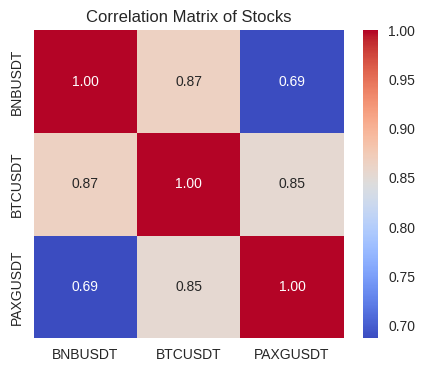

In [126]:
plt.figure(figsize=(5, 4))
sns.heatmap(df_close.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix of Stocks")
plt.show()

The low-risk group correlation matrix shows a strong correlation between Binance Coin (BNBUSTDT) and Bitcoin (BTCUSDT) with a coefficient of 0.87, indicating their co-directional movement in both bullish and corrective market trends, with BNB often acting as an altcoin dependent on the Bitcoin ecosystem, while BTCUSDT’s correlation with Pax Gold (PAXGUSDT) reaches 0.85, indicating the relative influence of the crypto market on gold-backed assets. However, with proper diversification, BNBUSDT’s correlation with PAXGUSDT is lower at 0.69, making this asset a risk hedge and allowing the portfolio to remain resilient to crypto’s extreme volatility; overall, these correlation levels (average 0.80) strike a good balance between growth (via BTC and BNB) and stability (from PAXG) and are recommended.

In [121]:
def make_portfo_close(df_close,df_open):
  close = df_close.to_numpy()
  oppen=df_open.to_numpy()
  R = close / oppen - 1
  Mu = R.mean(axis=0).reshape(-1, 1)
  Co = np.cov(R.T)
  nPortfolio = 80000

  Ms = np.zeros(nPortfolio)
  Ss = np.zeros(nPortfolio)
  nTicker = len(high_return_low_risk)
  for i in range(nPortfolio):
    #print(f'{i + 1} / {nPortfolio}')
    W = GetRandomWeight(nTicker)
    Ms[i] = M(W, Mu)
    Ss[i] = S(W, Co)
  plt.scatter(Ss, Ms, s=10, c='teal', marker='o')
  for i,t in enumerate(high_return_low_risk):
    W = np.zeros((nTicker, 1))
    W[i, 0] = 1
    m = M(W, Mu)[0]
    s = S(W, Co)[0,0]
    plt.scatter(s, m, s=40, c='crimson', marker='x')
    plt.text(s, m, t, fontdict={'size':14})
  plt.title('Return-Risk Plot For Low Risk Portfolios')
  plt.xlabel('Risk')
  plt.grid()
  plt.xticks(rotation=40)
  plt.ylabel('Return')
  plt.show()

In [142]:
pip install pyswarm

  Preparing metadata (setup.py) ... done
  Created wheel for pyswarm: filename=pyswarm-0.6-py3-none-any.whl size=4463 sha256=35549afc1935fe6c1263aaa7a8fd8d2ccee626cdd1c19c60dd3aa93e4f1823b7
  Stored in directory: /root/.cache/pip/wheels/bb/4f/ec/8970b83323e16aa95034da175454843947376614d6d5e9627f
Successfully built pyswarm
Note: you may need to restart the kernel to use updated packages.


In [143]:
import pyswarm as ps

In [128]:
def PrepareW(W:np.ndarray):
    W = W / W.sum()
    W = W.reshape((-1, 1))
    return W

In [129]:
def M(W:np.ndarray, Mu:np.ndarray):
    return np.dot(W.T, Mu)

In [130]:
def S(W:np.ndarray, Co:np.ndarray):
    return np.dot(np.dot(W.T, Co), W)

In [131]:
def R_MU(na):
  R = np.log(df_close[na] / df_close[na].shift(1)).dropna().to_numpy()
  Mu = R.mean(axis=0)
  Co = np.cov(R.T)
  return R,Mu,Co

In [132]:
def GetRandomWeight(N:int):
    W = np.random.uniform(low=0, high=1, size=(N, 1))
    W = W / W.sum()
    return W

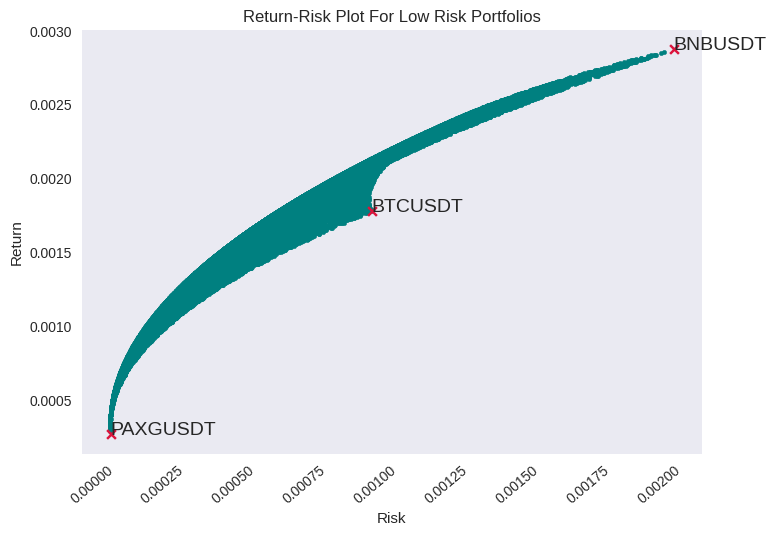

In [133]:
make_portfo_close(df_close,df_open)

The Return-Risk Plot for the low-risk group of the portfolio shows the Efficient Frontier with an ascending green curve indicating the optimal balance between expected return and risk (standard deviation), where PAXGUSDT with the lowest risk (~0.0005) and low return (0.0010) is on the left as a safe-haven asset (current price 4,100  and historical volatility close to gold) and is suitable for preserving capital in market corrections, BTCUSDT with medium risk (0.0010) and higher return (0.0015) is in the middle of the curve and offers a good balance as a market leader with a current price of ~96,400 and historical daily return of 0.15% (volatility 0.64), while BNBUSDT with the highest risk (0.0020) and superior return (0.0025) is at the bottom of the curve with a current price of 932 and daily return of 0.25% (volatility 0.88) It shows more growth potential than BTC but still remains in the low-risk range; overall, this portfolio is highly efficient with a medium correlation (0.80) between assets, and it is recommended to weight 50% BTC for leadership, 30% BNB for additional returns, and 20% PAXG to reduce overall risk to achieve maximum profit with minimal volatility in the autumn bullish trend.

### **Risk management**

In [134]:
global Log1

Log1 = []

In [135]:
def LossFunction2(W:np.ndarray, Mu:np.ndarray, Co:np.ndarray, S0:float, Penalty:float=10000):
    W = PrepareW(W)
    m = M(W, Mu)[0]
    s = S(W, Co)[0,0]
    Loss = -m
    if s > S0:
        Loss += Penalty * (s - S0)
    Log1.append(Loss)
    return Loss

In [136]:
S0 = 0.0001

In [137]:
nTicker = len(high_return_low_risk)

In [138]:
R,Mu,Co = R_MU(high_return_low_risk)

In [139]:
LB = np.zeros(nTicker)
UB = np.ones(nTicker)

In [144]:
BestW, BestLoss = ps.pso(LossFunction2,
                         LB,
                         UB,
                         args=(Mu, Co, S0),
                         swarmsize=40,
                         maxiter=60,
                         minfunc=1e-14,
                         debug=True)

BestW = PrepareW(BestW)

BestM = M(BestW, Mu)
BestS = S(BestW, Co)

No constraints given.
New best for swarm at iteration 1: [0.17207948 0.17380119 0.96782812] 0.2757769652756073
New best for swarm at iteration 1: [0.         0.14490956 0.89854337] -0.0004296987374845389
New best for swarm at iteration 1: [0.         0.28351504 1.        ] -0.0005102574390508704
Best after iteration 1: [0.         0.28351504 1.        ] -0.0005102574390508704
Best after iteration 2: [0.         0.28351504 1.        ] -0.0005102574390508704
Best after iteration 3: [0.         0.28351504 1.        ] -0.0005102574390508704
New best for swarm at iteration 4: [0.         0.29243927 1.        ] -0.0005155416617531518
New best for swarm at iteration 4: [0.         0.29252974 1.        ] -0.0005155948590572191
Best after iteration 4: [0.         0.29252974 1.        ] -0.0005155948590572191
New best for swarm at iteration 5: [0.         0.29686046 1.        ] -0.0005181326028968545
New best for swarm at iteration 5: [0.07569083 0.18350851 1.        ] -0.0005355541464197223
Bes

In [145]:
print(f'S0:         {S0}')
print(f'Best M:     {round(BestM[0], 6)}')
print(f'Best S:     {round(BestS[0,0], 6)}')

S0:         0.0001
Best M:     0.00056
Best S:     0.0001


In [146]:
name_s = []
value_s = []

In [147]:
for t, w in zip(high_return_low_risk, BestW):
    print(f'{t}: {round(100 * w[0], 3)} %')
    name_s.append(t)
    value_s.append(w[0])

BNBUSDT: 7.919 %
BTCUSDT: 13.827 %
PAXGUSDT: 78.254 %


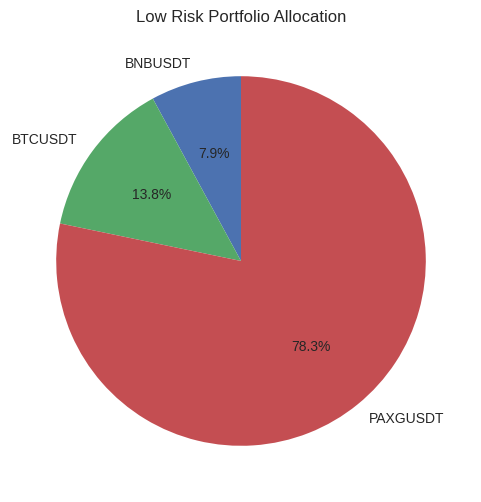

In [148]:
plt.figure(figsize=(6,6))
plt.pie(value_s, labels=name_s, autopct='%1.1f%%', startangle=90)
plt.title("Low Risk Portfolio Allocation")
plt.show()